In [1]:
import pandas as pd
import numpy as np

In [2]:
data_floor = pd.read_excel('data/2020_거주층별_가구데이터.xlsx', header = 1)
data_pop = pd.read_csv('data/2020_인구데이터.csv', thousands= ',', encoding= 'cp949')

In [3]:
data_floor.drop([0], inplace = True)

In [4]:
data_floor.tail()

,행정구역별(시군구),일반가구,지상,지하(반지하),옥상(옥탑),지하 거주 비율
273,거창군,25874,25698,1,175,0.003865
274,합천군,20139,20054,10,75,0.049655
275,제주특별자치도,263068,261358,489,1221,0.185883
276,제주시,191619,190304,371,944,0.193613
277,서귀포시,71449,71054,118,277,0.165153


In [5]:
index_list = data_floor['행정구역별(시군구)']
index_list = [sido.replace('\u3000',' ') for sido in index_list]
index_list = [sido for sido in index_list if sido[0] != ' ']
index_list

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [6]:
len(index_list)

17

In [7]:
len(data_floor['행정구역별(시군구)'])

277

In [8]:
for i in range(1, len(data_floor['행정구역별(시군구)'])+1):
    if data_floor['행정구역별(시군구)'][i] not in index_list:
        data_floor.drop([i], inplace = True)

data_floor

,행정구역별(시군구),일반가구,지상,지하(반지하),옥상(옥탑),지하 거주 비율
1,서울특별시,3982290,3750423,200849,31018,5.043555
27,부산광역시,1405037,1400161,3148,1728,0.224051
44,대구광역시,985816,983222,1224,1370,0.124161
53,인천광역시,1147200,1121899,24207,1094,2.110094
64,광주광역시,599217,598368,247,602,0.041220
70,대전광역시,631208,627616,1955,1637,0.309724
76,울산광역시,444087,443290,269,528,0.060574
82,세종특별자치시,139106,138811,209,86,0.150245
83,경기도,5098431,4997928,88936,11567,1.744380
132,강원도,661039,658636,1182,1221,0.178809


In [9]:
data_floor.rename(columns = {'행정구역별(시군구)': '행정구역'}, inplace=True)

In [10]:
data_floor.set_index('행정구역', inplace = True)

In [11]:
data_floor

,일반가구,지상,지하(반지하),옥상(옥탑),지하 거주 비율
행정구역,,,,,
서울특별시,3982290,3750423,200849,31018,5.043555
부산광역시,1405037,1400161,3148,1728,0.224051
대구광역시,985816,983222,1224,1370,0.124161
인천광역시,1147200,1121899,24207,1094,2.110094
광주광역시,599217,598368,247,602,0.041220
대전광역시,631208,627616,1955,1637,0.309724
울산광역시,444087,443290,269,528,0.060574
세종특별자치시,139106,138811,209,86,0.150245
경기도,5098431,4997928,88936,11567,1.744380


In [12]:
#data_floor.to_csv('2020_거주층별_가구데이터_최종.csv', sep = ',', encoding = 'utf-8')

In [13]:
data_pop

,행정구역,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,2020년02월_총인구수,2020년02월_세대수,2020년02월_세대당 인구,...,2020년11월_세대당 인구,2020년11월_남자 인구수,2020년11월_여자 인구수,2020년11월_남여 비율,2020년12월_총인구수,2020년12월_세대수,2020년12월_세대당 인구,2020년12월_남자 인구수,2020년12월_여자 인구수,2020년12월_남여 비율
0,전국 (1000000000),51847509,22513039,2.30,25862863,25984646,1.00,51844627,22561161,2.30,...,2.25,25844667,25989635,0.99,51829023,23093108,2.24,25841029,25987994,0.99
1,서울특별시 (1100000000),9733509,4334918,2.25,4745088,4988421,0.95,9736962,4345877,2.24,...,2.19,4708321,4971450,0.95,9668465,4417954,2.19,4701723,4966742,0.95
2,부산광역시 (2600000000),3411819,1499152,2.28,1674202,1737617,0.96,3410925,1502333,2.27,...,2.22,1663055,1732459,0.96,3391946,1530431,2.22,1661000,1730946,0.96
3,대구광역시 (2700000000),2436488,1032478,2.36,1204387,1232101,0.98,2432883,1033349,2.35,...,2.30,1195081,1226778,0.97,2418346,1056627,2.29,1193109,1225237,0.97
4,인천광역시 (2800000000),2956119,1239915,2.38,1481749,1474370,1.01,2954955,1242107,2.38,...,2.33,1473795,1468512,1.00,2942828,1267956,2.32,1473943,1468885,1.00
5,광주광역시 (2900000000),1456688,617379,2.36,720931,735757,0.98,1456121,618503,2.35,...,2.30,718370,733623,0.98,1450062,633582,2.29,717348,732714,0.98
6,대전광역시 (3000000000),1474152,636203,2.32,736259,737893,1.00,1473125,637726,2.31,...,2.25,731701,734192,1.00,1463882,652783,2.24,730699,733183,1.00
7,울산광역시 (3100000000),1147037,469007,2.45,589233,557804,1.06,1145710,469551,2.44,...,2.39,584305,553040,1.06,1136017,476893,2.38,583708,552309,1.06
8,세종특별자치시 (3600000000),342328,136056,2.52,170729,171599,0.99,343788,136629,2.52,...,2.47,176336,177094,1.00,355831,144275,2.47,177568,178263,1.00
9,경기도 (4100000000),13250368,5480444,2.42,6665310,6585058,1.01,13265377,5497087,2.41,...,2.37,6748061,6665398,1.01,13427014,5676401,2.37,6754469,6672545,1.01


In [14]:
list_data_pop = []
for i in range(len(data_pop['행정구역'])):
    list_data_pop.append(data_pop['행정구역'][i].split(' ')[0])

data_pop['행정구역'] = list_data_pop
data_pop.head()

,행정구역,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,2020년02월_총인구수,2020년02월_세대수,2020년02월_세대당 인구,...,2020년11월_세대당 인구,2020년11월_남자 인구수,2020년11월_여자 인구수,2020년11월_남여 비율,2020년12월_총인구수,2020년12월_세대수,2020년12월_세대당 인구,2020년12월_남자 인구수,2020년12월_여자 인구수,2020년12월_남여 비율
0,전국,51847509,22513039,2.30,25862863,25984646,1.00,51844627,22561161,2.30,...,2.25,25844667,25989635,0.99,51829023,23093108,2.24,25841029,25987994,0.99
1,서울특별시,9733509,4334918,2.25,4745088,4988421,0.95,9736962,4345877,2.24,...,2.19,4708321,4971450,0.95,9668465,4417954,2.19,4701723,4966742,0.95
2,부산광역시,3411819,1499152,2.28,1674202,1737617,0.96,3410925,1502333,2.27,...,2.22,1663055,1732459,0.96,3391946,1530431,2.22,1661000,1730946,0.96
3,대구광역시,2436488,1032478,2.36,1204387,1232101,0.98,2432883,1033349,2.35,...,2.30,1195081,1226778,0.97,2418346,1056627,2.29,1193109,1225237,0.97
4,인천광역시,2956119,1239915,2.38,1481749,1474370,1.01,2954955,1242107,2.38,...,2.33,1473795,1468512,1.00,2942828,1267956,2.32,1473943,1468885,1.00


In [15]:
data_pop

,행정구역,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,2020년02월_총인구수,2020년02월_세대수,2020년02월_세대당 인구,...,2020년11월_세대당 인구,2020년11월_남자 인구수,2020년11월_여자 인구수,2020년11월_남여 비율,2020년12월_총인구수,2020년12월_세대수,2020년12월_세대당 인구,2020년12월_남자 인구수,2020년12월_여자 인구수,2020년12월_남여 비율
0,전국,51847509,22513039,2.30,25862863,25984646,1.00,51844627,22561161,2.30,...,2.25,25844667,25989635,0.99,51829023,23093108,2.24,25841029,25987994,0.99
1,서울특별시,9733509,4334918,2.25,4745088,4988421,0.95,9736962,4345877,2.24,...,2.19,4708321,4971450,0.95,9668465,4417954,2.19,4701723,4966742,0.95
2,부산광역시,3411819,1499152,2.28,1674202,1737617,0.96,3410925,1502333,2.27,...,2.22,1663055,1732459,0.96,3391946,1530431,2.22,1661000,1730946,0.96
3,대구광역시,2436488,1032478,2.36,1204387,1232101,0.98,2432883,1033349,2.35,...,2.30,1195081,1226778,0.97,2418346,1056627,2.29,1193109,1225237,0.97
4,인천광역시,2956119,1239915,2.38,1481749,1474370,1.01,2954955,1242107,2.38,...,2.33,1473795,1468512,1.00,2942828,1267956,2.32,1473943,1468885,1.00
5,광주광역시,1456688,617379,2.36,720931,735757,0.98,1456121,618503,2.35,...,2.30,718370,733623,0.98,1450062,633582,2.29,717348,732714,0.98
6,대전광역시,1474152,636203,2.32,736259,737893,1.00,1473125,637726,2.31,...,2.25,731701,734192,1.00,1463882,652783,2.24,730699,733183,1.00
7,울산광역시,1147037,469007,2.45,589233,557804,1.06,1145710,469551,2.44,...,2.39,584305,553040,1.06,1136017,476893,2.38,583708,552309,1.06
8,세종특별자치시,342328,136056,2.52,170729,171599,0.99,343788,136629,2.52,...,2.47,176336,177094,1.00,355831,144275,2.47,177568,178263,1.00
9,경기도,13250368,5480444,2.42,6665310,6585058,1.01,13265377,5497087,2.41,...,2.37,6748061,6665398,1.01,13427014,5676401,2.37,6754469,6672545,1.01


In [16]:
data_pop = data_pop[['행정구역', '2020년01월_총인구수',	'2020년01월_세대수', '2020년01월_세대당 인구',	'2020년01월_남자 인구수',	'2020년01월_여자 인구수', 	'2020년01월_남여 비율']]

In [17]:
data_pop.set_index('행정구역', inplace = True)

In [18]:
data_pop = data_pop.drop('전국')
data_pop

,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율
행정구역,,,,,,
서울특별시,9733509,4334918,2.25,4745088,4988421,0.95
부산광역시,3411819,1499152,2.28,1674202,1737617,0.96
대구광역시,2436488,1032478,2.36,1204387,1232101,0.98
인천광역시,2956119,1239915,2.38,1481749,1474370,1.01
광주광역시,1456688,617379,2.36,720931,735757,0.98
대전광역시,1474152,636203,2.32,736259,737893,1.00
울산광역시,1147037,469007,2.45,589233,557804,1.06
세종특별자치시,342328,136056,2.52,170729,171599,0.99
경기도,13250368,5480444,2.42,6665310,6585058,1.01


In [19]:
#data_pop.to_csv('2020_인구데이터_최종.csv', sep = ',', encoding = 'utf-8')

In [20]:
import googlemaps
import folium

In [21]:
gmaps_key = ##
gmaps = googlemaps.Client(key = gmaps_key)

In [22]:
gmaps.geocode('서울특별시', language= 'ko')

[{'address_components': [{'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']}],
  'formatted_address': '대한민국 서울특별시',
  'geometry': {'bounds': {'northeast': {'lat': 37.7014549, 'lng': 127.1837949},
    'southwest': {'lat': 37.4282973, 'lng': 126.7644837}},
   'location': {'lat': 37.5518911, 'lng': 126.9917937},
   'location_type': 'APPROXIMATE',
   'viewport': {'northeast': {'lat': 37.7014549, 'lng': 127.1837949},
    'southwest': {'lat': 37.4282973, 'lng': 126.7644837}}},
  'place_id': 'ChIJzzlcLQGifDURm_JbQKHsEX4',
  'types': ['administrative_area_level_1', 'political']}]

In [23]:
list_of_index = [item for item in data_pop.index]
list_of_index

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [24]:
for i in data_pop.index:
    print(i)

서울특별시
부산광역시
대구광역시
인천광역시
광주광역시
대전광역시
울산광역시
세종특별자치시
경기도
강원도
충청북도
충청남도
전라북도
전라남도
경상북도
경상남도
제주특별자치도


In [25]:
from tqdm.notebook import tqdm
import time
lat = []
lng = []
for n in tqdm(range(len(data_pop.index))):
        target_name = data_pop.index[n]
        gmaps_output = gmaps.geocode(target_name)
        time.sleep(0.5)
        location = gmaps_output[0].get('geometry')
        lat.append(location['location']['lat'])
        lng.append(location['location']['lng'])

  0%|          | 0/17 [00:00<?, ?it/s]

In [26]:
lat

[37.5518911,
 35.2100142,
 35.8294374,
 37.4562557,
 35.1557358,
 36.3398175,
 35.5537228,
 36.5606976,
 37.5289145,
 37.724962,
 36.7378449,
 36.5296003,
 35.7197198,
 34.94020010000001,
 36.3436011,
 35.36956300000001,
 33.3846216]

In [27]:
lng

[126.9917937,
 129.0688702,
 128.5655119,
 126.7052062,
 126.8354271,
 127.3940486,
 129.2380554,
 127.2587334,
 127.1727772,
 128.3009629,
 127.8305242,
 126.8590621,
 127.1243977,
 126.9565003,
 128.7401566,
 128.2570135,
 126.5534925]

In [28]:
print(len(lat), len(lng))

17 17


In [29]:
data_pop['lat'] = lat
data_pop['lng'] = lng
data_pop.head()

,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,lat,lng
행정구역,,,,,,,,
서울특별시,9733509,4334918,2.25,4745088,4988421,0.95,37.551891,126.991794
부산광역시,3411819,1499152,2.28,1674202,1737617,0.96,35.210014,129.068870
대구광역시,2436488,1032478,2.36,1204387,1232101,0.98,35.829437,128.565512
인천광역시,2956119,1239915,2.38,1481749,1474370,1.01,37.456256,126.705206
광주광역시,1456688,617379,2.36,720931,735757,0.98,35.155736,126.835427


In [30]:
data_floor = data_floor.reset_index()
data_floor

,행정구역,일반가구,지상,지하(반지하),옥상(옥탑),지하 거주 비율
0,서울특별시,3982290,3750423,200849,31018,5.043555
1,부산광역시,1405037,1400161,3148,1728,0.224051
2,대구광역시,985816,983222,1224,1370,0.124161
3,인천광역시,1147200,1121899,24207,1094,2.110094
4,광주광역시,599217,598368,247,602,0.041220
5,대전광역시,631208,627616,1955,1637,0.309724
6,울산광역시,444087,443290,269,528,0.060574
7,세종특별자치시,139106,138811,209,86,0.150245
8,경기도,5098431,4997928,88936,11567,1.744380
9,강원도,661039,658636,1182,1221,0.178809


In [31]:
data_floor['행정구역'].replace('\u3000', '')


0       서울특별시
1       부산광역시
2       대구광역시
3       인천광역시
4       광주광역시
5       대전광역시
6       울산광역시
7     세종특별자치시
8         경기도
9         강원도
10       충청북도
11       충청남도
12       전라북도
13       전라남도
14       경상북도
15       경상남도
16    제주특별자치도
Name: 행정구역, dtype: object

In [32]:
data_floor.set_index(data_floor['행정구역'], inplace = True)
data_floor = data_floor.drop('행정구역', axis= 1)
data_floor

,일반가구,지상,지하(반지하),옥상(옥탑),지하 거주 비율
행정구역,,,,,
서울특별시,3982290,3750423,200849,31018,5.043555
부산광역시,1405037,1400161,3148,1728,0.224051
대구광역시,985816,983222,1224,1370,0.124161
인천광역시,1147200,1121899,24207,1094,2.110094
광주광역시,599217,598368,247,602,0.041220
대전광역시,631208,627616,1955,1637,0.309724
울산광역시,444087,443290,269,528,0.060574
세종특별자치시,139106,138811,209,86,0.150245
경기도,5098431,4997928,88936,11567,1.744380


In [33]:
data_pop

,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,lat,lng
행정구역,,,,,,,,
서울특별시,9733509,4334918,2.25,4745088,4988421,0.95,37.551891,126.991794
부산광역시,3411819,1499152,2.28,1674202,1737617,0.96,35.210014,129.068870
대구광역시,2436488,1032478,2.36,1204387,1232101,0.98,35.829437,128.565512
인천광역시,2956119,1239915,2.38,1481749,1474370,1.01,37.456256,126.705206
광주광역시,1456688,617379,2.36,720931,735757,0.98,35.155736,126.835427
대전광역시,1474152,636203,2.32,736259,737893,1.00,36.339818,127.394049
울산광역시,1147037,469007,2.45,589233,557804,1.06,35.553723,129.238055
세종특별자치시,342328,136056,2.52,170729,171599,0.99,36.560698,127.258733
경기도,13250368,5480444,2.42,6665310,6585058,1.01,37.528914,127.172777


In [34]:
data_pop.index.values

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [35]:
data_floor.index.values

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [36]:
data_floor.columns

Index(['일반가구', '지상', '지하(반지하)', '옥상(옥탑)', '지하 거주 비율'], dtype='object')

In [37]:
data_pop = data_pop.join(data_floor, how = 'left')

In [42]:
name_list

0     강원
1     경기
2     경남
3     경북
4     광주
5     대구
6     대전
7     부산
8     서울
9     세종
10    울산
11    인천
12    전남
13    전북
14    제주
15    충남
16    충북
Name: 지역명, dtype: object

In [43]:
data_pop.head()

,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,lat,lng,일반가구,지상,지하(반지하),옥상(옥탑),지하 거주 비율
행정구역,,,,,,,,,,,,,
서울특별시,9733509,4334918,2.25,4745088,4988421,0.95,37.551891,126.991794,3982290,3750423,200849,31018,5.043555
부산광역시,3411819,1499152,2.28,1674202,1737617,0.96,35.210014,129.068870,1405037,1400161,3148,1728,0.224051
대구광역시,2436488,1032478,2.36,1204387,1232101,0.98,35.829437,128.565512,985816,983222,1224,1370,0.124161
인천광역시,2956119,1239915,2.38,1481749,1474370,1.01,37.456256,126.705206,1147200,1121899,24207,1094,2.110094
광주광역시,1456688,617379,2.36,720931,735757,0.98,35.155736,126.835427,599217,598368,247,602,0.041220


In [44]:
data_pop = data_pop.reset_index()
data_pop

,행정구역,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,lat,lng,일반가구,지상,지하(반지하),옥상(옥탑),지하 거주 비율
0,서울특별시,9733509,4334918,2.25,4745088,4988421,0.95,37.551891,126.991794,3982290,3750423,200849,31018,5.043555
1,부산광역시,3411819,1499152,2.28,1674202,1737617,0.96,35.210014,129.068870,1405037,1400161,3148,1728,0.224051
2,대구광역시,2436488,1032478,2.36,1204387,1232101,0.98,35.829437,128.565512,985816,983222,1224,1370,0.124161
3,인천광역시,2956119,1239915,2.38,1481749,1474370,1.01,37.456256,126.705206,1147200,1121899,24207,1094,2.110094
4,광주광역시,1456688,617379,2.36,720931,735757,0.98,35.155736,126.835427,599217,598368,247,602,0.041220
5,대전광역시,1474152,636203,2.32,736259,737893,1.00,36.339818,127.394049,631208,627616,1955,1637,0.309724
6,울산광역시,1147037,469007,2.45,589233,557804,1.06,35.553723,129.238055,444087,443290,269,528,0.060574
7,세종특별자치시,342328,136056,2.52,170729,171599,0.99,36.560698,127.258733,139106,138811,209,86,0.150245
8,경기도,13250368,5480444,2.42,6665310,6585058,1.01,37.528914,127.172777,5098431,4997928,88936,11567,1.744380
9,강원도,1540540,720119,2.14,774866,765674,1.01,37.724962,128.300963,661039,658636,1182,1221,0.178809


In [45]:
data_pop.loc[data_pop['행정구역'] == '서울특별시', '행정구역'] = '서울'
data_pop.loc[data_pop['행정구역'] == '부산광역시', '행정구역'] = '부산'
data_pop.loc[data_pop['행정구역'] == '대구광역시', '행정구역'] = '대구'
data_pop.loc[data_pop['행정구역'] == '인천광역시', '행정구역'] = '인천'
data_pop.loc[data_pop['행정구역'] == '광주광역시', '행정구역'] = '광주'
data_pop.loc[data_pop['행정구역'] == '대전광역시', '행정구역'] = '대전'
data_pop.loc[data_pop['행정구역'] == '울산광역시', '행정구역'] = '울산'
data_pop.loc[data_pop['행정구역'] == '세종특별자치시', '행정구역'] = '세종'
data_pop.loc[data_pop['행정구역'] == '경기도', '행정구역'] = '경기'
data_pop.loc[data_pop['행정구역'] == '강원도', '행정구역'] = '강원'
data_pop.loc[data_pop['행정구역'] == '충청북도', '행정구역'] = '충북'
data_pop.loc[data_pop['행정구역'] == '충청남도', '행정구역'] = '충남'
data_pop.loc[data_pop['행정구역'] == '전라북도', '행정구역'] = '전북'
data_pop.loc[data_pop['행정구역'] == '전라남도', '행정구역'] = '전남'
data_pop.loc[data_pop['행정구역'] == '경상남도', '행정구역'] = '경남'
data_pop.loc[data_pop['행정구역'] == '경상북도', '행정구역'] = '경북'
data_pop.loc[data_pop['행정구역'] == '제주특별자치도', '행정구역'] = '제주'

data_pop['행정구역'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [46]:
data_pop = data_pop.set_index(['행정구역'])
data_pop

,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,lat,lng,일반가구,지상,지하(반지하),옥상(옥탑),지하 거주 비율
행정구역,,,,,,,,,,,,,
서울,9733509,4334918,2.25,4745088,4988421,0.95,37.551891,126.991794,3982290,3750423,200849,31018,5.043555
부산,3411819,1499152,2.28,1674202,1737617,0.96,35.210014,129.068870,1405037,1400161,3148,1728,0.224051
대구,2436488,1032478,2.36,1204387,1232101,0.98,35.829437,128.565512,985816,983222,1224,1370,0.124161
인천,2956119,1239915,2.38,1481749,1474370,1.01,37.456256,126.705206,1147200,1121899,24207,1094,2.110094
광주,1456688,617379,2.36,720931,735757,0.98,35.155736,126.835427,599217,598368,247,602,0.041220
대전,1474152,636203,2.32,736259,737893,1.00,36.339818,127.394049,631208,627616,1955,1637,0.309724
울산,1147037,469007,2.45,589233,557804,1.06,35.553723,129.238055,444087,443290,269,528,0.060574
세종,342328,136056,2.52,170729,171599,0.99,36.560698,127.258733,139106,138811,209,86,0.150245
경기,13250368,5480444,2.42,6665310,6585058,1.01,37.528914,127.172777,5098431,4997928,88936,11567,1.744380


In [47]:
#data_pop.to_csv('인구_거주지위치.csv', sep  = ',',encoding = 'utf-8')

In [48]:
#한글 처리 코드
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin': #macos
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #windows os
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

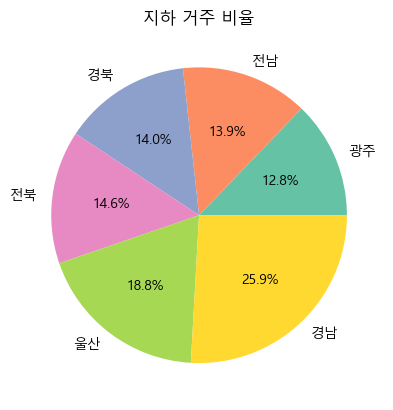

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
ratio = data_pop.sort_values(by = '지하 거주 비율', ascending= True)['지하 거주 비율'][:6]
labels = data_pop.sort_values(by = '지하 거주 비율', ascending= True).index[:6]
plt.title('지하 거주 비율')
plt.pie(ratio, labels = labels, autopct = '%.1f%%', colors=sns.color_palette('Set2'))
plt.show()

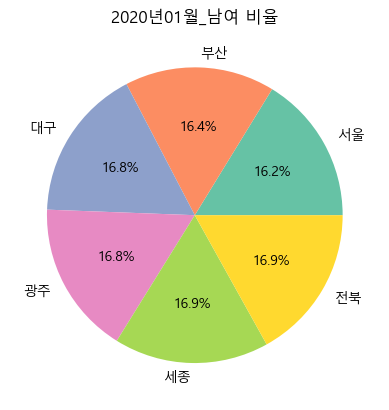

In [50]:
import matplotlib.pyplot as plt
ratio = data_pop.sort_values(by = '2020년01월_남여 비율', ascending= True)['2020년01월_남여 비율'][:6]
labels = data_pop.sort_values(by = '2020년01월_남여 비율', ascending= True).index[:6]
plt.title('2020년01월_남여 비율')
plt.pie(ratio, labels = labels, autopct = '%.1f%%', colors=sns.color_palette('Set2'))
plt.show()

In [51]:
map = folium.Map(location = [data_pop['lat'].median(), data_pop['lng'].median()], zoom_start = 6.5)
loc = '지하(반지하) 거주 인구 수'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
map.get_root().html.add_child(folium.Element(title_html))
for n in range(len(data_pop.index)):
    folium.CircleMarker([data_pop['lat'][n],
                         data_pop['lng'][n]],
                         radius = data_pop['지하(반지하)'][n] / 10000, color = '#CD3181',
                         fill_color = '#CD3181',
                         fill = True,
                         ).add_to(map)
folium.TileLayer("Stamen Toner").add_to(map)
map

In [52]:

map = folium.Map(location = [data_pop['lat'].median(), data_pop['lng'].median()], zoom_start = 6.5)
loc = '옥상(옥탑) 거주 인구 수'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
map.get_root().html.add_child(folium.Element(title_html))
for n in range(len(data_pop.index)):
    folium.CircleMarker([data_pop['lat'][n],
                         data_pop['lng'][n]],
                         radius = data_pop['옥상(옥탑)'][n] / 1000, color = '#CD3181',
                         fill_color = '#CD3181',
                         fill = True).add_to(map)
folium.TileLayer("Stamen Toner").add_to(map)
map

In [53]:
map = folium.Map(location = [data_pop['lat'].median(), data_pop['lng'].median()], zoom_start = 6.5)
loc = '지하(반지하) 거주 비율'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
map.get_root().html.add_child(folium.Element(title_html))
for n in range(len(data_pop.index)):
    folium.CircleMarker([data_pop['lat'][n],
                         data_pop['lng'][n]],
                         radius = data_pop['지하 거주 비율'][n]*10, color = '#CD3181',
                         fill_color = '#CD3181',
                         fill = True).add_to(map)
folium.TileLayer("Stamen Toner").add_to(map)
map

In [54]:

map = folium.Map(location = [data_pop['lat'].median(), data_pop['lng'].median()], zoom_start = 6.5)
loc = '2020년01월_남여 비율'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
map.get_root().html.add_child(folium.Element(title_html))
for n in range(len(data_pop.index)):
    folium.CircleMarker([data_pop['lat'][n],
                         data_pop['lng'][n]],
                         radius = data_pop['2020년01월_남여 비율'][n]*10, color = '#CD3181',
                         fill_color = '#CD3181',
                         fill = True).add_to(map)
folium.TileLayer("Stamen Toner").add_to(map)
map